<font size =8> Barnacle Counting using a Pre-trained model

<font size=4>

In this experiment, I will utilize an API for a YOLO model that has been fine-tuned on a dataset of barnacle images. 


<font size = 5> Importing necessary modules

In [58]:
import tempfile
from inference_sdk import InferenceHTTPClient, InferenceConfiguration
from helpers import *
import matplotlib.pyplot as plt

<font size=6> Image Preprocessing </font>

<font size=4> During initial testing, I observed that the model performs best when the image contains a relatively small number of target objects (barnacles), likely due to the dataset it was trained on.

To optimize detection performance, the first step in this pipeline is to divide each input image into smaller tiles that are stored in a temporary directory within the Notebook. These tiles are then processed sequentially by the model. For each tile, the model detects and counts the barnacles present. Finally, the counts from all tiles are summed to estimate the total number of barnacles in the original image.



In [59]:
with tempfile.TemporaryDirectory() as tmpdir:
    output_directory  = tmpdir
image_path = "images/sample_image.png"

try : 
    os.mkdir(output_directory)
    print(f"Directory '{output_directory}' created successfully.")

#Already created this file
except FileExistsError: 
    print(f"Directory '{output_directory}' already exists.")

#Check access and permissions settings 
except PermissionError: 
    print(f"Permission denied: Unable to create '{output_directory}.")

#Any other type of errors 
except Exception as e: 
    print(f"An error occured:{e}")

Directory 'C:\Users\arses\AppData\Local\Temp\tmpv5oz95dz' created successfully.


<FONT SIZE =5> Cropping the image into 30 smaller tiles 


In [28]:
crop_image_into_tiles(image_path,output_directory)

Image cropped successfully


<font size = 5> Iniializing the model

In [29]:
custom_configuration= InferenceConfiguration(confidence_threshold=0.3)
CLIENT= InferenceHTTPClient(
    api_url ="https://serverless.roboflow.com", 
    api_key= "CW6dMrLkiMDw9IRcbujY"
)

<font size= 5> Running Loop

In [30]:
number_of_barnacles= 0
number_of_images= directory_size(output_directory)
for i in range(number_of_images):
    with CLIENT.use_configuration(custom_configuration):
        result = CLIENT.infer(f"{output_directory}/tile_{i}.png", model_id = "barnacles-lnd34/1")
    number_of_barnacles+= len(result['predictions'])

print(f"The number of barnacles present in the image is: {number_of_barnacles}")

Number of files in 'C:\Users\arses\AppData\Local\Temp\tmpr758komf': 30
The number of barnacles present in the image is: 927


<font size =5> Cleaning the Temporary directory

In [31]:
remove_files_from_directory(output_directory)

<font size = 6> Measuring Performance

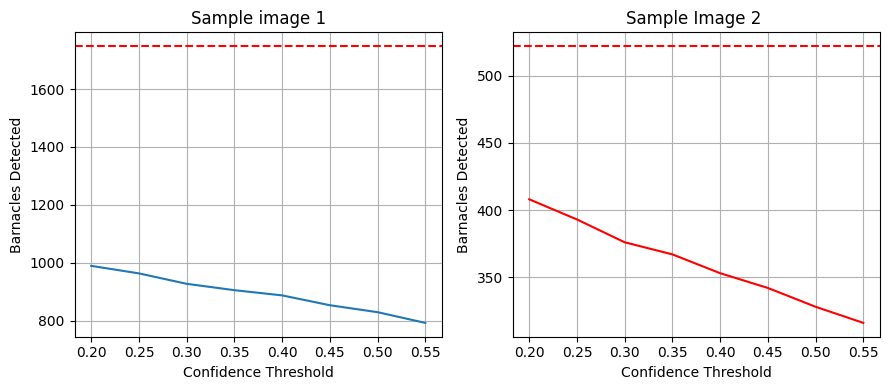

In [54]:
confidence_threshold_2 = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
results_2 = [408, 393, 376, 367, 353, 342, 328, 316]

confidence_threshold = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
results= [989, 963, 927, 905, 887, 853, 829, 792]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,4))


ax1.plot(confidence_threshold, results)
ax1.set_title('Sample image 1')
ax1.set_xlabel('Confidence Threshold')
ax1.set_ylabel('Barnacles Detected')
ax1.grid()
ax1.axhline(y= 1748, color='r', linestyle='--', label='Actual number of Barnacles')


ax2.plot(confidence_threshold_2, results_2, color='red')
ax2.set_title('Sample Image 2 ')
ax2.set_xlabel('Confidence Threshold')
ax2.set_ylabel('Barnacles Detected')
ax2.axhline(y= 522, color='r', linestyle='--', label='Actual number of Barnacles')
ax2.grid()

plt.tight_layout()
plt.show()

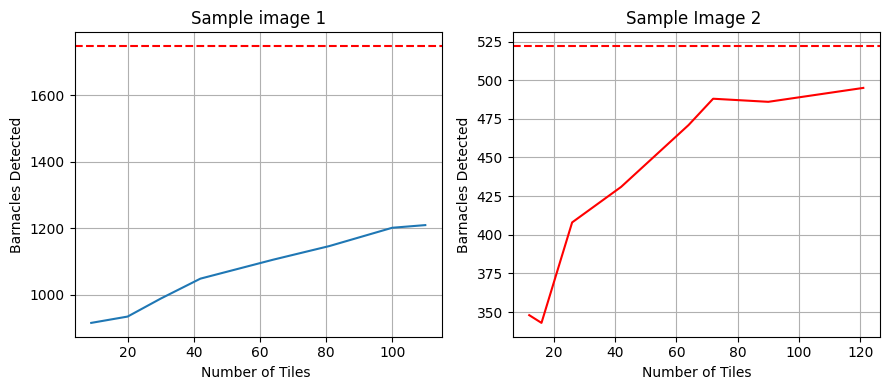

In [57]:
tiles = [9, 20, 30, 42, 64, 81, 100, 110]
results_tiles = [916, 935, 989, 1049, 1106, 1147, 1202, 1210]

tiles_2 = [12, 16, 26, 42, 64, 72, 90, 121]
results_tiles_2 = [348, 343, 408, 431, 471, 488, 486, 495]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,4))

ax1.plot(tiles, results_tiles)
ax1.set_title('Sample image 1')
ax1.set_xlabel('Number of Tiles ')
ax1.set_ylabel('Barnacles Detected')
ax1.grid()
ax1.axhline(y= 1748, color='r', linestyle='--', label='Actual number of Barnacles')


ax2.plot(tiles_2, results_tiles_2, color='red')
ax2.set_title('Sample Image 2 ')
ax2.set_xlabel('Number of Tiles')
ax2.set_ylabel('Barnacles Detected')
ax2.axhline(y= 522, color='r', linestyle='--', label='Actual number of Barnacles')
ax2.grid()

plt.tight_layout()
plt.show()